### 1- Blurring an image with a 2D convolution matrix

In [36]:
#importing the modules needed
import cv2
import numpy as np

In [37]:
#reading the image
image = cv2.imread('C:\Image\clone.jpg')

In [38]:
#creating the kernel(2d convulation matrix)
kernel1 = np.ones((5, 5), np.float32)/25

In [46]:
#Applying the filter2D() function
img = cv2.filter2D(src=image, ddepth=-1, kernel=kernel1)

# Averaging Filter
# Applying filter using cv2.blur
img1 = cv2.blur(image, (5,5))

# Applying filter using cv2.boxFilter
img2 = cv2.boxFilter(image,-1,(2,2))


In [47]:
#shoeying the original and ouput image
cv2.imshow('Original', image)
cv2.imshow('Kernel Blur', img)

#cv2.imshow('Image', np.hstack((img1, img2)))


cv2.waitKey()
cv2.destroyAllWindows()

### 2-Order Statistics (Nonlinear) Filters

In [61]:
img3 = cv2.imread('C:\Image\galaxy.jpg')

In [62]:
median = cv2.medianBlur(img3, 5)
compare = np.concatenate((img3, median), axis=1)

In [63]:
cv2.imshow('img', compare)
cv2.waitKey()
cv2.destroyAllWindows()

### 3-Spatial Sharpening Filters: Laplas Operator

In [ ]:
import sys
import cv2 as cv

def main(argv):
    ddepth= cv.CV_16S
    kernel_size = 3
    window_name = "Laplace Demo"
    
    # Load
    imageName = argv[0] if len(argv) > 0 else 'C:\Image\earth.jpg'
    
    src = cv.imread(cv.samples.findFile(imageName), cv.IMREAD_COLOR)
    
    if src is None:
        print('Error opening image')
        print('Program Arguments: [image_name -- default earth.jpg]')
        return -1
    
    src = cv.GaussianBlur(src, (3,3), 0)
    
    src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
    
    dst = cv.Laplacian(src_gray, ddepth, ksize=kernel_size)
    
    abs_dst = cv.convertScaleAbs(dst)
    
    cv.imshow(window_name, abs_dst)
    cv.waitKey(0)
    
    return 0

if __name__ == "__main__":
    main(sys.argv[1:])

## --- Extra ---
### Laplacian - Sobel - Roberts Cross Gradient

Text(0.5, 1.0, 'Original')

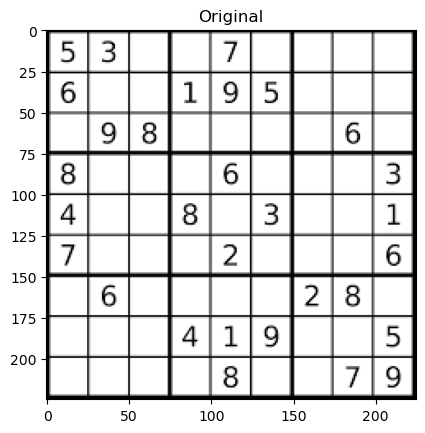

In [38]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('C:\Image\sudoku.png', 0)

img_blur = cv2.GaussianBlur(img, (5,5), 0)

laplacian = cv2.Laplacian(img_blur, cv2.CV_64F)

sobelx=cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobely=cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)

plt.imshow(img, cmap='gray')
plt.title('Original')

Text(0.5, 1.0, 'Laplacian')

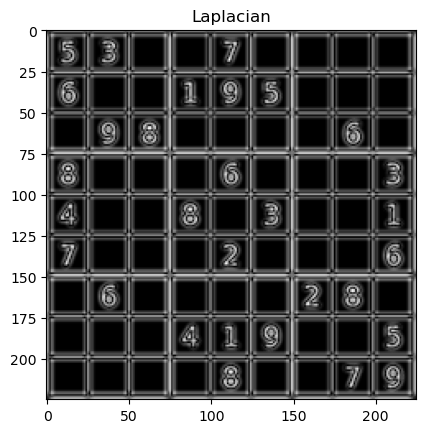

In [49]:
plt.imshow(np.abs(laplacian), cmap='gray')
plt.title('Laplacian')


Text(0.5, 1.0, 'Sobel-X')

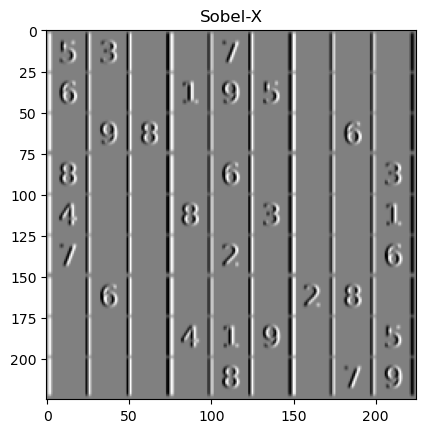

In [50]:
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel-X')

Text(0.5, 1.0, 'Sobel-Y')

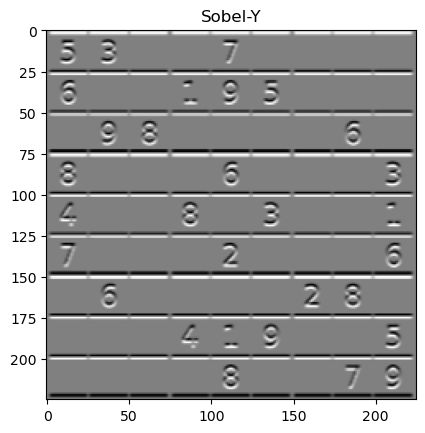

In [51]:
plt.imshow(sobely, cmap='gray')
plt.title('Sobel-Y')

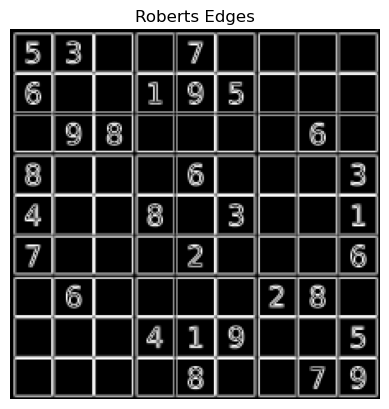

In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Resmi oku (örnek olarak lena.png kullanıldı)
image = cv2.imread('C:\Image\sudoku.png', cv2.IMREAD_GRAYSCALE)

# Roberts operatörü filtreleri
roberts_x = np.array([[1, 0], [0, -1]])
roberts_y = np.array([[0, 1], [-1, 0]])

# Filtreleri uygula
roberts_grad_x = cv2.filter2D(image, cv2.CV_64F, roberts_x)
roberts_grad_y = cv2.filter2D(image, cv2.CV_64F, roberts_y)

# Kenarları birleştir
roberts_edges = np.sqrt(roberts_grad_x**2 + roberts_grad_y**2)

# Görüntüyü göster
plt.imshow(roberts_edges, cmap='gray')
plt.title('Roberts Edges')
plt.axis('off')
plt.show()
